This notebook is to establish a baseline that the end model is intended to outperform. The baseline is a simple linear regression model of yearly electricity usage versus square footage of each residence (TOTSQFT)

In [3]:
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.DataFrame.from_csv('cap-data/data-clean-round1/data_v2.csv', index_col= 0, encoding = 'utf-8')
nweight = pd.DataFrame.from_csv('cap-data/data-clean-round1/nweight.csv', index_col= 0, encoding = 'utf-8')
pc = pd.DataFrame.from_csv('cap-data/data-clean-round1/pc_v2.csv', index_col= 0, encoding = 'utf-8')
kwh = pd.DataFrame.from_csv('cap-data/data-clean-round1/kwh.csv', index_col= 0, encoding = 'utf-8')
pc_cat = pd.DataFrame.from_csv('cap-data/data-clean-round1/pc_cat_vars.csv', index_col= 0, encoding = 'utf-8')

### Fitting Linear Regression using `sklearn`

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = data['TOTSQFT']
x = x.reshape(len(x),1)
y = kwh.KWH
nwgt = nweight.NWEIGHT.as_matrix()
x_nwgt = pd.DataFrame(x, columns = ['TOTSQFT'])
x_nwgt['NWEIGHT'] = nwgt / sum(nwgt) # Weights are converted into ratio of data it represents

# This creates a LinearRegression object
lm = LinearRegression(fit_intercept = False)
lm

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_nwgt, kwh, test_size=0.4)

### Train the Model

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
x_train = X_train.TOTSQFT
x_train = x_train.reshape(len(x_train), 1)
nwt_t = X_train.NWEIGHT

x_test = X_test.TOTSQFT
x_test = x_test.reshape(len(x_test), 1)
nwt_te = X_test.NWEIGHT

In [10]:
x_train.shape

(7249, 1)

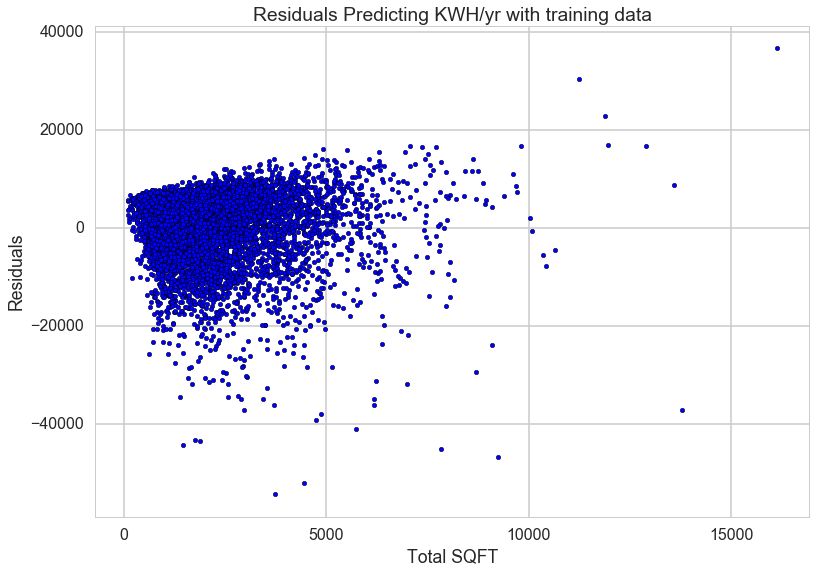

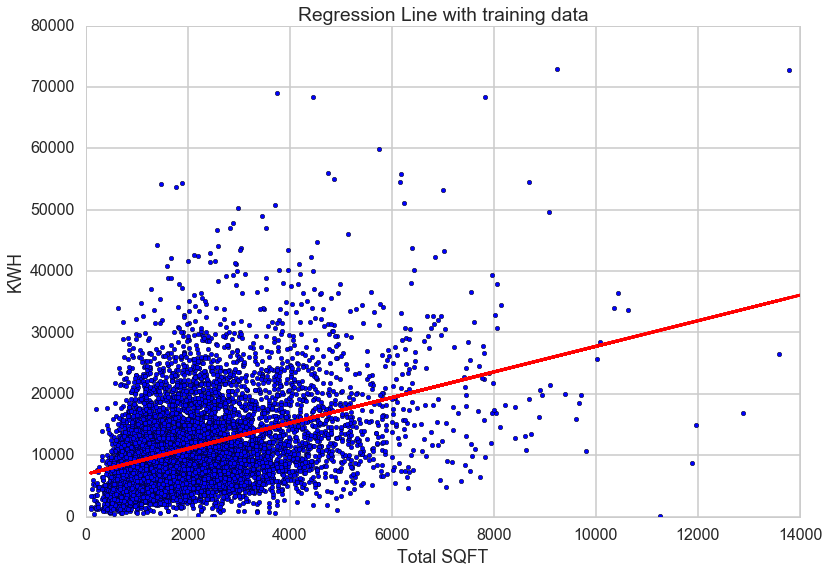

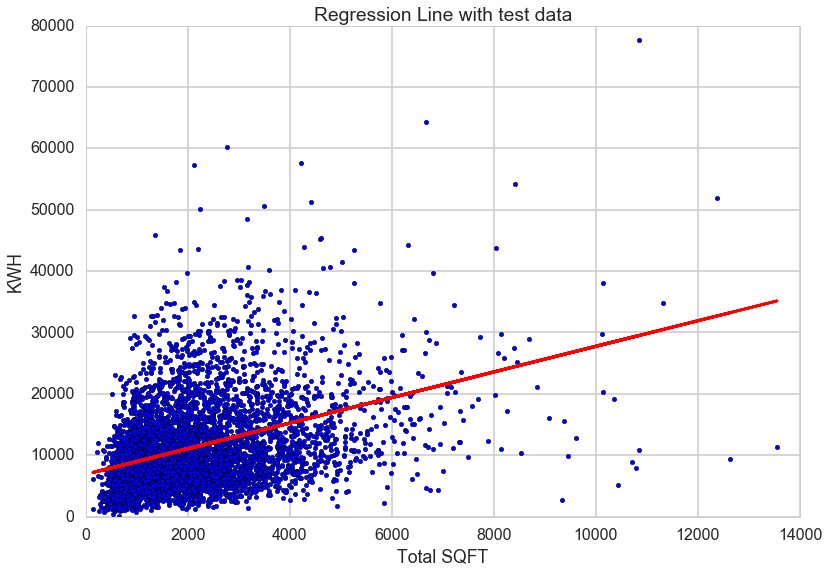

Training data scores
R-square: 0.160377799947
RMSE: 6943.77953273
Test data scores
R-square: 0.128664377051
RMSE: 7219.7858147


In [11]:
lm = LinearRegression(fit_intercept = True)
lm.fit(x_train, y_train, sample_weight = nwt_t)
pred = lm.predict(x_train)
res = pred - y_train # Residuals
# print(lm.score(x_train, y_train, sample_weight = nwt_t))
# print(mean_squared_error(y_train, pred, nwt_t))

plt.scatter(x_train, res)
plt.ylabel("Residuals")
plt.xlabel("Total SQFT")
plt.title("Residuals Predicting KWH/yr with training data")
plt.autoscale(tight = True)
plt.show()


plt.scatter(x_train, y_train)
plt.plot(x_train, pred,'r')
plt.ylabel("KWH")
plt.xlabel("Total SQFT")
plt.title("Regression Line with training data")
# plt.autoscale(tight = True)
plt.axis([0,14000,0,80000])
plt.show()

plt.scatter(x_test, y_test)
pred2 = lm.predict(x_test)
#res2 = pred2 - y_test # Residuals
plt.plot(x_test, pred2,'r')
plt.ylabel("KWH")
plt.xlabel("Total SQFT")
plt.title("Regression Line with test data")
#plt.autoscale(tight = True)
plt.axis([0,14000,0,80000])
plt.show()
print('Training data scores')
print('R-square: %s' % lm.score(x_train, y_train, sample_weight = nwt_t))
print('RMSE: %s' % (mean_squared_error(y_train, pred, nwt_t))**0.5)
print('Test data scores')
print('R-square: %s' % lm.score(x_test, y_test, sample_weight = nwt_te))
print('RMSE: %s' %(mean_squared_error(y_test, pred2, nwt_te))**0.5)

In [12]:
pos = res[res.KWH > 0].count()
neg = res[res.KWH < 0].count()
zer = res[res.KWH == 0].count()
rat = pos/neg
print('The ratio of positive to negative residuals is %s and there are %s zeros' %(rat,zer))

The ratio of positive to negative residuals is KWH    1.503972
dtype: float64 and there are KWH    0
dtype: int64 zeros


# Legacy code below this line only

### Test the model

In [ ]:
x_test = X_test.TOTSQFT
x_test = x_test.reshape(len(x_test), 1)
nwt_te = X_test.NWEIGHT

0.159563836943


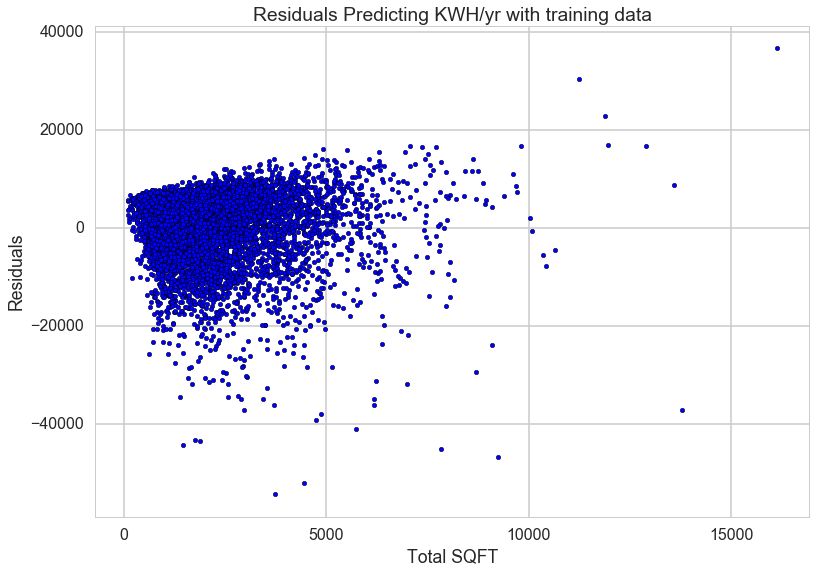

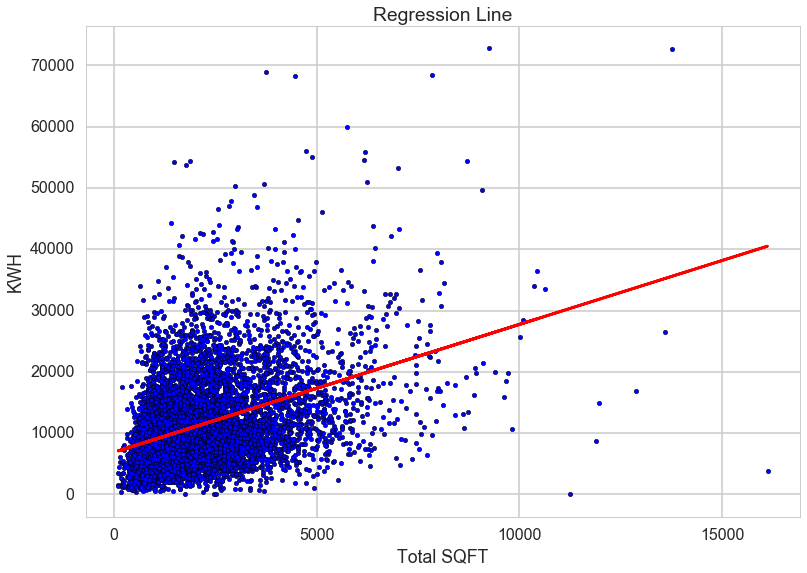

In [ ]:
lm = LinearRegression(fit_intercept = True)
lm.fit(x_test, y_test, sample_weight = nwt_te)
pred1 = lm.predict(x_train)
res = pred - y_train # Residuals
print(lm.score(x_train, y_train, sample_weight = nwt_t))
plt.scatter(x_train, res)
plt.ylabel("Residuals")
plt.xlabel("Total SQFT")
plt.title("Residuals Predicting KWH/yr with training data")
plt.autoscale(tight = True)
plt.show()


plt.scatter(x_train, y_train)
plt.plot(x_train, pred,'r')
plt.ylabel("KWH")
plt.xlabel("Total SQFT")
plt.title("Regression Line")
plt.autoscale(tight = True)
plt.show()

### Legacy code

In [ ]:
# lm = LinearRegression(fit_intercept=True)
# lm.fit(x, y, nwgt)
# pred = lm.predict(x)
# res = pred-y
# plt.scatter(x, pred-y)
# plt.ylabel("Residuals")
# plt.xlabel("Total SQFT")
# plt.title("comparing model to data with no intercept")
# print(lm.score(x, y))